In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing



In [2]:
# --- When to Use Log Transformation ---
# Log Transformation is a data preparation technique used to:
# 1. Handle skewed data: It can help to make a highly skewed distribution more normal (or at least less skewed).
#    Many statistical models and machine learning algorithms assume or perform better with normally distributed data.
# 2. Reduce the effect of outliers: It compresses the range of the data, meaning the impact of very large values is dampened.
#
# --- Data Requirements ---
# The standard log transformation, log(x), can only be applied to data with strictly positive values (x > 0).
# If the data contains zeros or negative values, you must use a variation, such as the log1p transformation (log(1+x)),
# which can handle zeros.




In [3]:
# 1. Load a sample dataset
# We'll use the California Housing dataset from scikit-learn, which has several skewed numerical features.
housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)




In [4]:
# 2. Select a feature to transform
# Let's examine the 'Population' feature, which is often right-skewed.
feature_to_transform = 'Population'
print(f"Original data description for '{feature_to_transform}':")
print(df[feature_to_transform].describe())
print("\n")




Original data description for 'Population':
count    20640.000000
mean      1425.476744
std       1132.462122
min          3.000000
25%        787.000000
50%       1166.000000
75%       1725.000000
max      35682.000000
Name: Population, dtype: float64




In [5]:
# 3. Apply the Log Transformation
# We will create a new column to store the transformed data.
# Since the 'Population' data is all positive, we can use np.log().
# If there were zeros, we would use np.log1p() which calculates log(1+x).
transformed_col_name = f'{feature_to_transform}_Log'
df[transformed_col_name] = np.log(df[feature_to_transform])




DataFrame head with the new log-transformed column:
   Population  Population_Log
0       322.0        5.774552
1      2401.0        7.783641
2       496.0        6.206576
3       558.0        6.324359
4       565.0        6.336826


Displaying before and after visualizations...


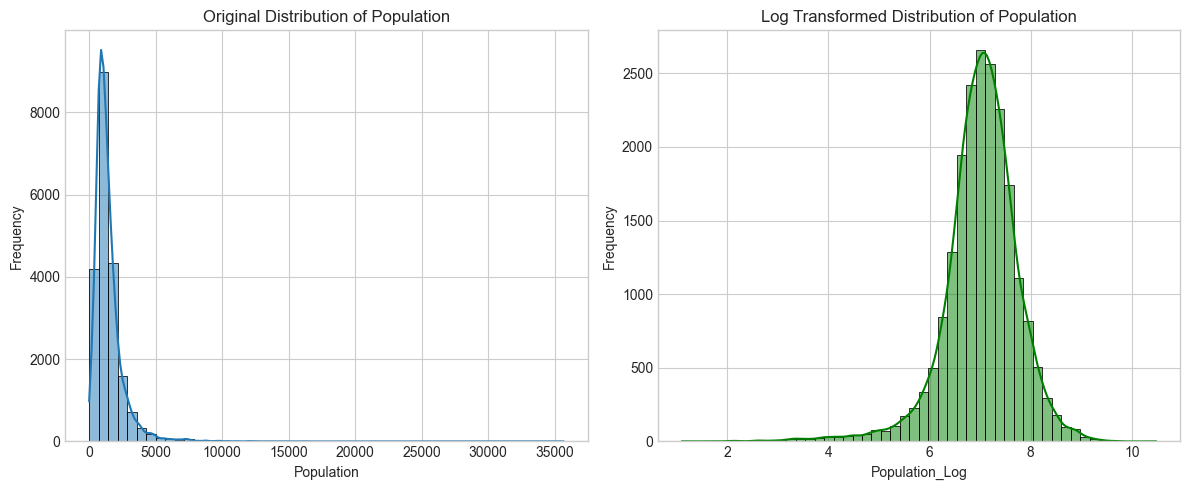

In [6]:
# 4. Show the result of the transformation
# First, let's look at the head of the updated DataFrame.
print("DataFrame head with the new log-transformed column:")
print(df[[feature_to_transform, transformed_col_name]].head())
print("\n")

# Second, let's visualize the 'before and after' distributions.
print("Displaying before and after visualizations...")
plt.style.use('seaborn-v0_8-whitegrid')
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot original data distribution
sns.histplot(df[feature_to_transform], kde=True, ax=axes[0], bins=50)
axes[0].set_title(f'Original Distribution of {feature_to_transform}')
axes[0].set_xlabel(feature_to_transform)
axes[0].set_ylabel('Frequency')


# Plot transformed data distribution
sns.histplot(df[transformed_col_name], kde=True, ax=axes[1], color='green', bins=50)
axes[1].set_title(f'Log Transformed Distribution of {feature_to_transform}')
axes[1].set_xlabel(transformed_col_name)
axes[1].set_ylabel('Frequency')


plt.tight_layout()
plt.show()

# --- Interpretation of the Result ---
# The first histogram shows the original 'Population' data, which is heavily right-skewed.
# A few very large values stretch the x-axis, making it hard to see the distribution of the majority of the data points.
# The second histogram shows the log-transformed data. The distribution is now much closer to a normal (bell-shaped) curve.
# This transformed data is often more suitable for use in linear models, clustering algorithms, and other techniques
# that are sensitive to the scale and distribution of input features.